In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)



In [14]:
df1 = pd.read_csv("house price data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,52325.2789
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,160712.4000
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,83034.7400
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,127230.6500
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,68302.7700


In [15]:
df1.shape

(13320, 9)

#### dataset is big enough 

In [16]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [17]:
df2= df1.drop(['area_type','availability','society','balcony'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,52325.2789
1,Chikka Tirupathi,4 Bedroom,2600,5.0,160712.4000
2,Uttarahalli,3 BHK,1440,2.0,83034.7400
3,Lingadheeranahalli,3 BHK,1521,3.0,127230.6500
4,Kothanur,2 BHK,1200,2.0,68302.7700


## Data Cleaning process starts below

In [18]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

## This shows us a summary of empty values in our dataset

### the empty rows are too little compared to the dataframe size so we can drop those values

In [19]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [20]:
df3.shape

(13246, 5)

In [21]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0])) # we are splitting strings when there are space and we will keep only the numbers


C:\Users\Charbel Saade\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,52325.2789,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,160712.4000,4
2,Uttarahalli,3 BHK,1440,2.0,83034.7400,3
3,Lingadheeranahalli,3 BHK,1521,3.0,127230.6500,3
4,Kothanur,2 BHK,1200,2.0,68302.7700,2


In [24]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

### as you can see we see that there are illogical values, for example 43 and 27 which mean that some appartments have more than 27 bedrooms, this is an error

In [25]:
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,308032.1,27
4684,Munnekollal,43 Bedroom,2400,40.0,883918.2,43


In [26]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

we will have to convert these values so we obtain unique numbers and not ranges like '1133-1384', one way to do it is to take the average value between these two values.

In [27]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [28]:
df3[~df3['total_sqft'].apply(is_float)].head(20)
                                        

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,249104.22000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,638831.79000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,72327.27635,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,58244.85230,2
188,KR Puram,2 BHK,1015 - 1540,2.0,76070.53600,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,24776.49500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,85405.24790,2
648,Arekere,9 Bedroom,4125Perch,9.0,354906.55000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,64459.06510,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,595975.15000,4


now we have to convert these values to float numbers

In [29]:
def convert_range_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [30]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_range_to_num)
df4.head(35)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,52325.2789,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,160712.4000,4
2,Uttarahalli,3 BHK,1440.0,2.0,83034.7400,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,127230.6500,3
4,Kothanur,2 BHK,1200.0,2.0,68302.7700,2
5,Whitefield,2 BHK,1170.0,2.0,50892.2600,2
6,Old Airport Road,4 BHK,2732.0,4.0,273211.0800,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,803562.0000,4
8,Marathahalli,3 BHK,1310.0,3.0,84708.8275,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,495529.9000,6


In [31]:
df5 = df4.copy()
#let's create a new feature, price per sqft
df5['price_per_sqft']= df5["price"]/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,52325.2789,2,49.550454
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,160712.4000,4,61.812462
2,Uttarahalli,3 BHK,1440.0,2.0,83034.7400,3,57.663014
3,Lingadheeranahalli,3 BHK,1521.0,3.0,127230.6500,3,83.649343
4,Kothanur,2 BHK,1200.0,2.0,68302.7700,2,56.918975


In [32]:
len(df5.location.unique())

1304

In [33]:
df5.location = df5.location.apply(lambda x : x.strip())
location_describe = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_describe

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

we will now group all locations that are present less than 10 times in one category and we will call it other location.

In [34]:
len(location_describe[location_describe<=10])

1052

In [35]:
otherLocation = location_describe[location_describe<=10]
df5.location = df5.location.apply(lambda x:'other' if x in otherLocation else x)
len(df5.location.unique())


242

## Error Removal 

In this part we will investigate the values and remove all illogical values, for example usually one bedroom constitutes around 300 sqft of the total area of the apartment. So we will remove values that are illogical based on this.
Another important characteristic of real estate pricing is price per sqft, so we will need to filter data points where price per sqft is either very low or very high.

In [36]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [37]:
df6.price_per_sqft.describe()

count    12456.000000
mean        84.487886
std         55.822479
min          3.586964
25%         56.390316
50%         70.902529
75%         92.632842
max       2363.417647
Name: price_per_sqft, dtype: float64

As we see above, min and max prices show a big variation. We will proceed by removing those outliers by using standard deviation and mean.

In [38]:
def removeOutliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = removeOutliers(df6)
df7.shape

(10241, 7)

<b> Now let's visualize how 2 BHK and 3 BHK property prices vary for a specific location

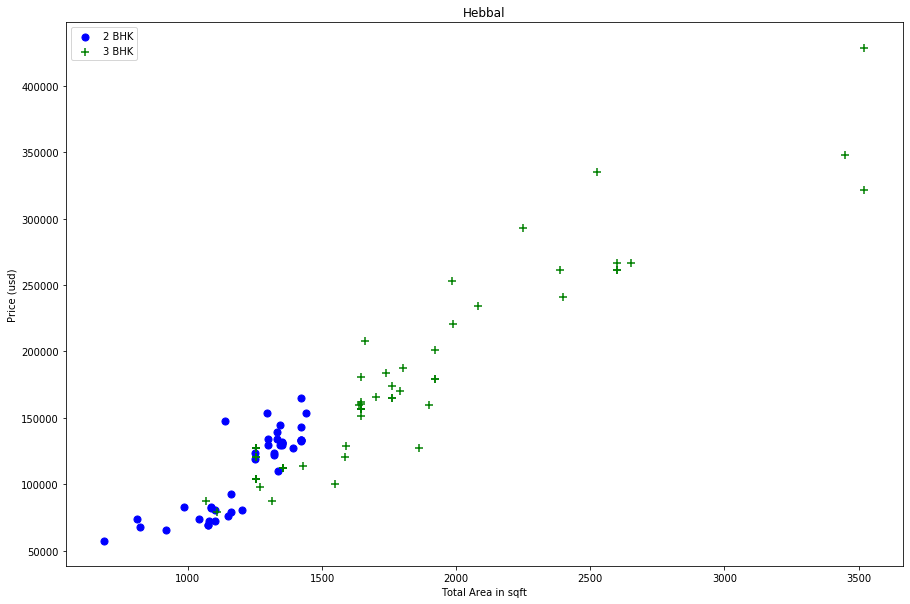

In [39]:
def plotChart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Area in sqft")
    plt.ylabel("Price (usd)")
    plt.title(location)
    plt.legend()
    
plotChart(df7,"Hebbal") 


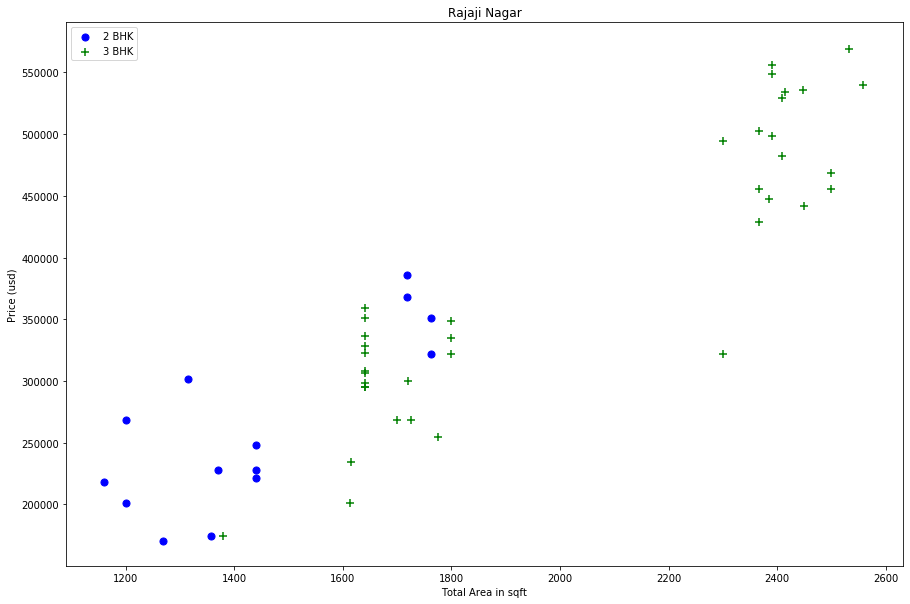

In [40]:
plotChart(df7,"Rajaji Nagar")

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

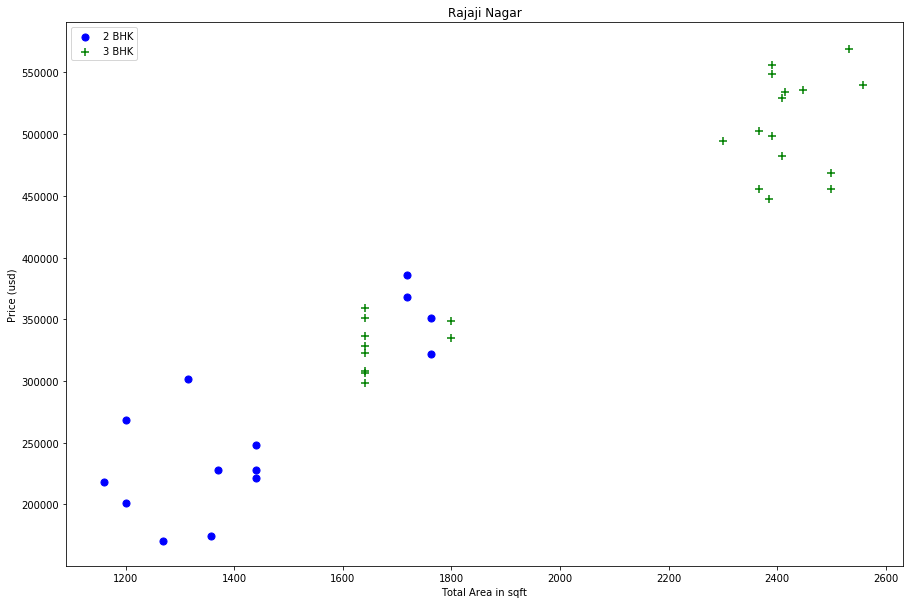

In [42]:
plotChart(df8,"Rajaji Nagar")


<b> As we can see in the chart above, after applying the function to remove outliers the chart outliers data points were being removed from the dataframe. 
    So for the majority of the houses that have 3 BHK for a same location have a higher price

Text(0, 0.5, 'Count')

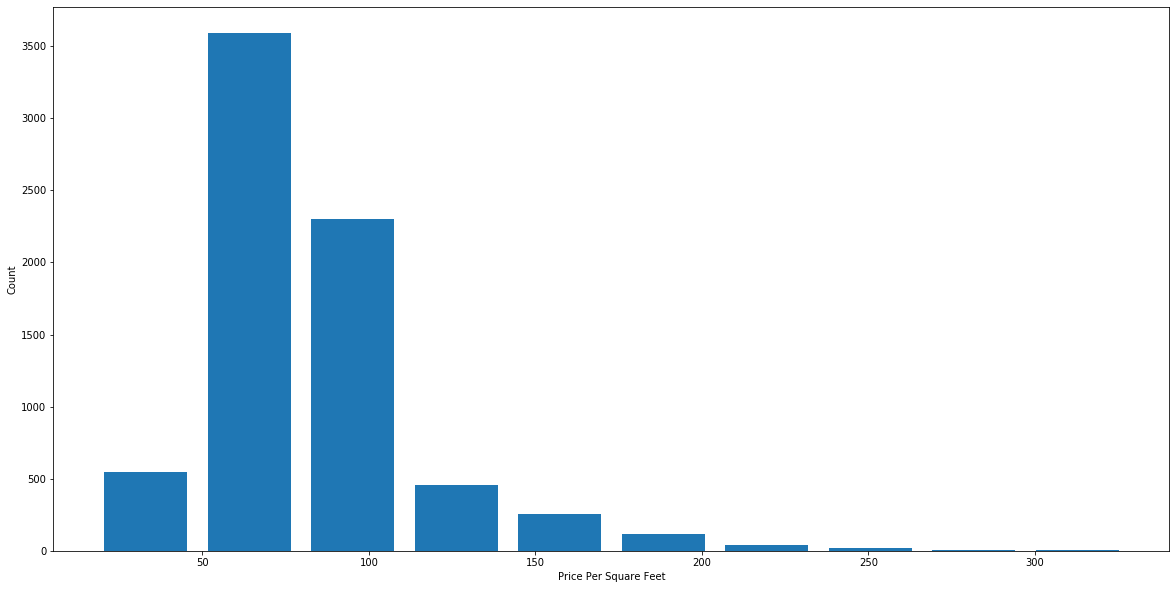

In [43]:

import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

The dataset distribution looks good for now. 

Now let's look at the bathroom's outliers.

In [44]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

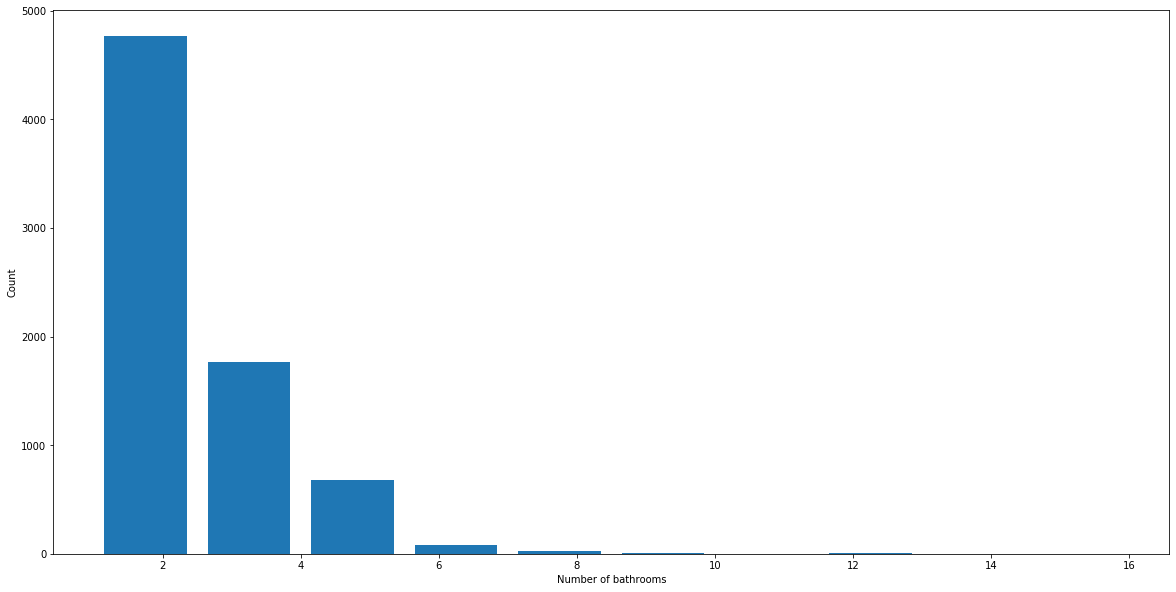

In [45]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

<b> It is unusual to have a number of bathrooms bigger than the number of bedrooms in a house.

In [46]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,107141.60,4,43.553496
5238,Nagasandra,4 Bedroom,7000.0,8.0,602671.50,4,86.095929
6711,Thanisandra,3 BHK,1806.0,6.0,155355.32,3,86.021772
8411,other,6 BHK,11338.0,9.0,1339270.00,6,118.122244


In [47]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [48]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,573207.56,4
1,1st Block Jayanagar,1630.0,3.0,259818.38,3
2,1st Block Jayanagar,1875.0,2.0,314728.45,3
3,1st Block Jayanagar,1200.0,2.0,174105.10,3
4,1st Block Jayanagar,1235.0,2.0,198211.96,2


We removed the size feature because we already have the bhk feature, and also we removed the price_per_sqft feature because it in not useful at this point.

Converting text data to numerical data using dummies

In [49]:

dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,573207.56,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,259818.38,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,314728.45,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,174105.10,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,198211.96,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,573207.56,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,259818.38,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
x = df12.drop('price', axis='columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y = df12.price
y.head()

0    573207.56
1    259818.38
2    314728.45
3    174105.10
4    198211.96
Name: price, dtype: float64

## Model Building using sklearn

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [55]:

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8452277697873419

In [56]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

Using K fold to measure the accuracy of our model

In [57]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree_regressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(x,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.818352,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree_regressor,0.720431,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


<b> Linear regression is better 

In [58]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [59]:

def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr_clf.predict([X])[0]

In [60]:
predict_price('Yelahanka New Town',1000,5,5)

89637.60580522066

In [61]:
predict_price('Yelahanka New Town',1100,5,5)

100273.4685887974

let's export our model to a pickle file so it can be used by our python flask server

In [62]:
import pickle
with open('home_priceModel.pickle','wb') as f:
    pickle.dump(lr_clf,f)

export columns to a json file

In [63]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))